# this is  real state project

In [1]:
import pandas as pd
import numpy as np

In [2]:
house= pd.read_csv("D:/axx.csv")

In [3]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAID     505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PIRAITO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
#value counts
house['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:

house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

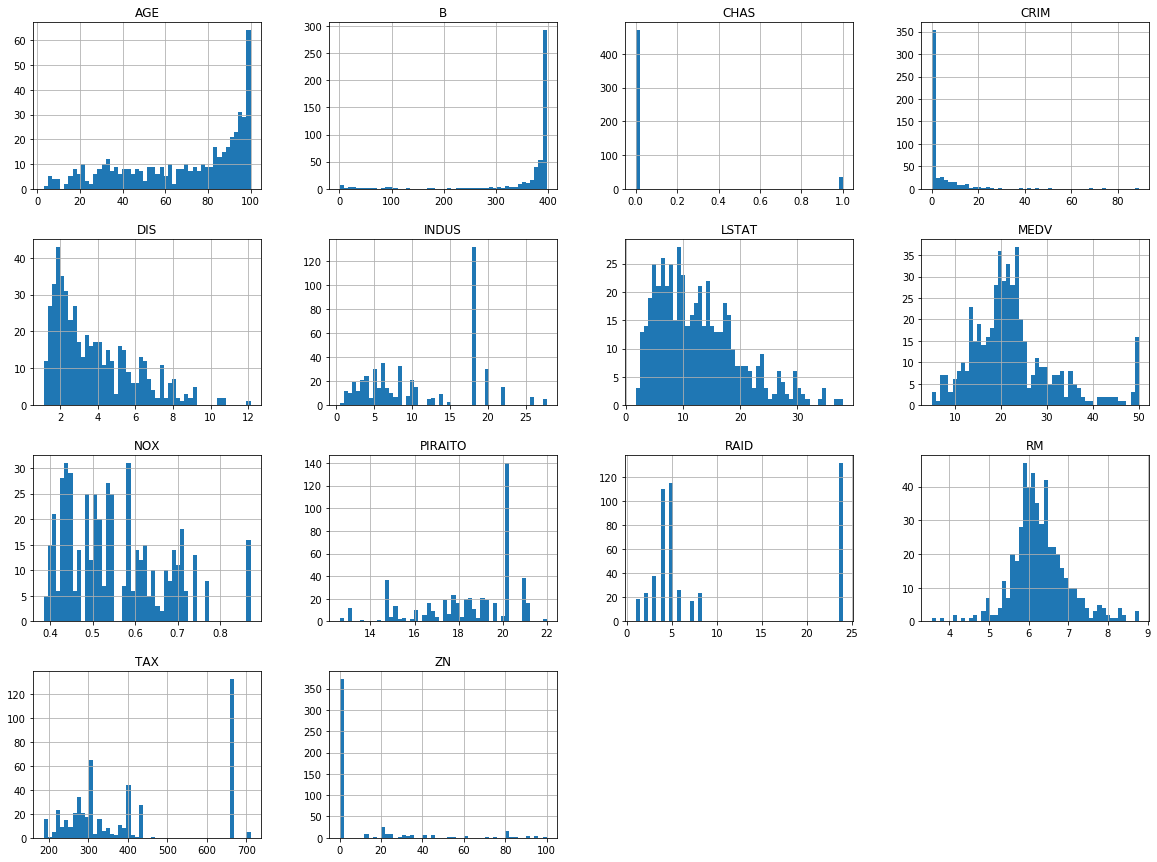

In [9]:
house.hist(bins=50,figsize=(20,15))
plt.show()

# ytrain test spilliting

In [10]:
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices= shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set=split_train_test(house,0.2)
print(f"Rows in train_set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train_set:404
Rows in test set:101



In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(house,test_size=0.2)
print(f"Rows in train_set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train_set:404
Rows in test set:101



In [13]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(house, house['CHAS']):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]
   

In [14]:
 strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.295795,12.633663,10.824059,0.069307,0.548434,6.228743,67.532673,3.918028,8.990099,398.257426,18.557426,356.371386,12.747624,22.214851
std,8.154485,24.510191,6.917639,0.255242,0.115036,0.643586,27.120753,2.239920,8.333661,166.876041,1.893586,91.522054,7.328224,8.694646
min,0.010960,0.000000,0.740000,0.000000,0.385000,3.561000,9.800000,1.321600,1.000000,187.000000,13.000000,2.520000,1.980000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.856000,43.700000,2.198000,4.000000,284.000000,17.400000,372.750000,7.120000,17.300000
50%,0.188360,0.000000,8.140000,0.000000,0.510000,6.230000,71.700000,3.360300,5.000000,307.000000,18.700000,390.940000,11.220000,21.200000
75%,2.010190,20.000000,18.100000,0.000000,0.624000,6.565000,92.900000,5.118000,8.000000,437.000000,20.200000,396.900000,16.030000,24.500000
max,51.135800,95.000000,27.740000,1.000000,0.871000,8.266000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [15]:
 strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 239 to 319
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAID     101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PIRAITO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [16]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
95/7

13.571428571428571

In [19]:
376/28

13.428571428571429

In [20]:
house = strat_train_set.copy()

# loking for corellation

In [21]:
corr_matrix = house.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.720229
ZN         0.364518
B          0.336543
DIS        0.258470
CHAS       0.215011
AGE       -0.378268
CRIM      -0.388796
RAID      -0.394198
NOX       -0.428956
TAX       -0.479734
INDUS     -0.493431
PIRAITO   -0.510033
LSTAT     -0.743208
Name: MEDV, dtype: float64

In [22]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204B32D3248>,
      dtype=object)

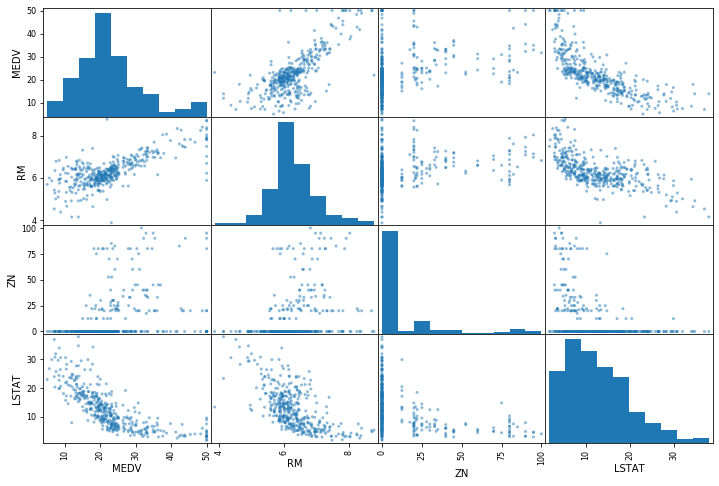

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(house[attributes], figsize = (12,8))

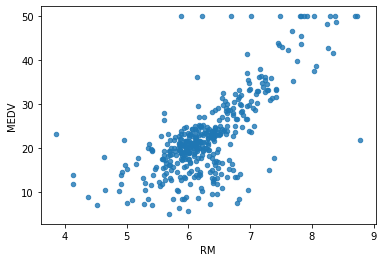

In [24]:
house.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

# tring attribute 

In [25]:
house["TAXRM"] = house['TAX']/house['RM']

In [26]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT,MEDV,TAXRM
335,0.03427,0.0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80,19.5,38.166638
183,0.08308,0.0,2.46,0,0.488,5.604,89.8,2.9879,3,193,17.8,391.00,13.98,26.4,34.439686
56,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6,37.558685
429,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5,104.914934
258,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90,30.1,38.585209


In [27]:
corr_matrix = house.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.720229
ZN         0.364518
B          0.336543
DIS        0.258470
CHAS       0.215011
AGE       -0.378268
CRIM      -0.388796
RAID      -0.394198
NOX       -0.428956
TAX       -0.479734
INDUS     -0.493431
PIRAITO   -0.510033
TAXRM     -0.562412
LSTAT     -0.743208
Name: MEDV, dtype: float64

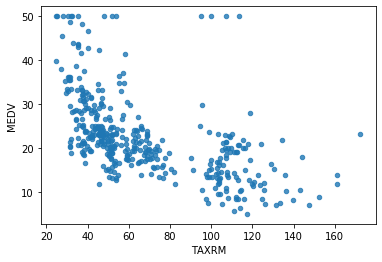

In [28]:
house.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [29]:
house = strat_train_set.drop("MEDV", axis=1)
house_labels = strat_train_set["MEDV"].copy()

In [30]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

# To take care of missing attributes, you have three options:

In [31]:
a = house.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(404, 13)

In [32]:
median = house["RM"].median() # Compute median for Option 3

In [33]:
house["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

335    5.869
183    5.604
56     6.816
429    6.348
258    6.842
       ...  
20     5.965
437    5.935
470    6.229
156    6.943
368    6.683
Name: RM, Length: 404, dtype: float64

In [34]:
house.shape

(404, 13)

In [35]:
house.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.701885,11.029703,11.236807,0.069307,0.556302,6.297889,68.843812,3.763566,9.710396,411.009901,18.437871,356.650124,12.648416
std,8.726233,23.063250,6.846480,0.254290,0.116316,0.717406,28.460811,2.075162,8.802650,169.174613,2.226187,91.442719,7.101232
min,0.009060,0.000000,0.460000,0.000000,0.392000,3.863000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.888000,45.075000,2.087875,4.000000,277.000000,17.300000,376.132500,6.990000
50%,0.290250,0.000000,9.690000,0.000000,0.538000,6.198500,78.250000,3.100900,5.000000,337.000000,19.100000,392.010000,11.490000
75%,3.716457,12.500000,18.100000,0.000000,0.625750,6.630250,94.100000,5.218725,24.000000,666.000000,20.200000,396.210000,17.112500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.1985e+00, 7.8250e+01, 3.1009e+00, 5.0000e+00, 3.3700e+02,
       1.9100e+01, 3.9201e+02, 1.1490e+01])

In [38]:
X = imputer.transform(house)

In [39]:
house_tr = pd.DataFrame(X, columns=house.columns)

In [40]:
house_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.701885,11.029703,11.236807,0.069307,0.556302,6.297889,68.843812,3.763566,9.710396,411.009901,18.437871,356.650124,12.648416
std,8.726233,23.063250,6.846480,0.254290,0.116316,0.717406,28.460811,2.075162,8.802650,169.174613,2.226187,91.442719,7.101232
min,0.009060,0.000000,0.460000,0.000000,0.392000,3.863000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.888000,45.075000,2.087875,4.000000,277.000000,17.300000,376.132500,6.990000
50%,0.290250,0.000000,9.690000,0.000000,0.538000,6.198500,78.250000,3.100900,5.000000,337.000000,19.100000,392.010000,11.490000
75%,3.716457,12.500000,18.100000,0.000000,0.625750,6.630250,94.100000,5.218725,24.000000,666.000000,20.200000,396.210000,17.112500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
 house.dropna(subset=["RM"])# it used to remove rm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PIRAITO,B,LSTAT
335,0.03427,0.0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
183,0.08308,0.0,2.46,0,0.488,5.604,89.8,2.9879,3,193,17.8,391.00,13.98
56,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95
429,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64
258,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83
437,13.67810,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,68.95,34.02
470,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87
156,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59


# sckite _learn design

##Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

# Feature Scaling

##Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

# creating a pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [44]:
house_num_tr = my_pipeline.fit_transform(house)

In [45]:
house_num_tr.shape

(404, 13)

# Selecting a desired model for Dragon Real Estates

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(house_num_tr, house_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
some_data = house.iloc[:5]

In [50]:
some_labels = house_labels.iloc[:5]

In [51]:
prepared_data = my_pipeline.transform(some_data)

In [52]:
model.predict(prepared_data)

array([19.493, 24.874, 31.146, 14.366, 30.761])

In [53]:
list(some_labels)

[19.5, 26.4, 31.6, 14.5, 30.1]

# Evaluating the model

In [54]:
from sklearn.metrics import mean_squared_error
house_predictions = model.predict(house_num_tr)
mse = mean_squared_error(house_labels, house_predictions)
rmse = np.sqrt(mse)

In [55]:
rmse

1.2471866915439545

# Using better evaluation technique - Cross Validation

In [56]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, house_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [57]:
rmse_scores

array([1.82704038, 3.61122846, 2.44191619, 3.40968267, 4.40143037,
       4.30973555, 2.41772676, 3.16348628, 2.90504688, 4.03121661])

In [58]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [59]:
print_scores(rmse_scores)

Scores: [1.82704038 3.61122846 2.44191619 3.40968267 4.40143037 4.30973555
 2.41772676 3.16348628 2.90504688 4.03121661]
Mean:  3.251851015597815
Standard deviation:  0.8192710522474099


# Saving the model

In [68]:
from joblib import dump, load
dump(model, 'abhay.joblib')

['abhay.joblib']

# Testing the model on test data

In [61]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [62]:
final_rmse

2.7757103488285777

In [63]:
prepared_data[0]

array([-0.42081871, -0.47883013, -0.88429447, -0.27288841, -0.35552282,
       -0.59857366, -0.79308227,  0.70806667, -0.53577465, -1.10679597,
        0.79252726,  0.44071068, -0.40161309])

# Using the model

In [69]:
from joblib import dump, load
import numpy as np
model = load('abhay.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([21.286])